---
title: "Lab2 Avocado Prices "
author: "Hanna Werszhok"
format: html
jupiter:python3
---

# 0 Import the data

In [1]:
import pandas as pd 
import numpy as np
data_dir = "C:/Users/user/Desktop/Hanna/CalPoly/DataScienceMachineLearningWithPython/Lab2/data/"
av_init=pd.read_csv(data_dir+'avocado-updated-2020.csv',delimiter=',')

# 1 The data set description

In [2]:
av_init

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


In [3]:
av_init.dtypes

date              object
average_price    float64
total_volume     float64
4046             float64
4225             float64
4770             float64
total_bags       float64
small_bags       float64
large_bags       float64
xlarge_bags      float64
type              object
year               int64
geography         object
dtype: object

In [4]:
av_init.isnull().values.any()

False

# 2 Cleaning the data

In [5]:
av_cl=av_init.rename(columns={'4046':'small/medium','4225':'large', '4770':'extra_large'}) #rename some columтs
av_cl

,date,average_price,total_volume,small/medium,large,extra_large,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


In [6]:
av_cl['date'] = pd.to_datetime(av_cl['date']) #convert the 'date' from object to datetime
av_cl.dtypes

date             datetime64[ns]
average_price           float64
total_volume            float64
small/medium            float64
large                   float64
extra_large             float64
total_bags              float64
small_bags              float64
large_bags              float64
xlarge_bags             float64
type                     object
year                      int64
geography                object
dtype: object

#  3 Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [7]:
av_cl['geography'].unique() #extract unique region for the analysis

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

In [8]:
# we was able to recognize five main regions of the USA in our dataset: west, midsouth, northeast, south central, and southeast
# bild the new data frame wich contains main regions only (west, midsouth, northeast, south central, southeast)
av_reg = av_cl[(av_cl['geography'] == 'Northeast')
              |(av_cl['geography'] == 'Midsouth')
              |(av_cl['geography'] == 'South Central')
              |(av_cl['geography'] == 'Southeast')
              |(av_cl['geography'] == 'West')]
# rebild this data frame, which will contain the data of organic avocado sales in 2017 for the main regions 
# (west, midsouth, northeast, south central, southeast)
av_reg=av_reg[(av_reg['year']==2017)&(av_reg['type']=='organic')]
# build the new data frame, grouped by 'geography' with total sales for the year of small avocados
agg_func_math = {'small/medium': ['sum']}
av_reg=av_reg.groupby(['geography']).agg(agg_func_math).round(2).reset_index()
av_reg.columns = ['geography', 'small/medium']
av_reg

,geography,small/medium
0,Midsouth,186395.50
1,Northeast,925832.36
2,South Central,1717104.19
3,Southeast,285124.34
4,West,1870206.29


In [9]:
#find the row with the most sales
i=av_reg['small/medium'].idxmax ()
av_temp=av_reg.loc[i]
print("region ",av_temp[0],' with ' ,av_temp[1], ' avocado')

region  West  with  1870206.29  avocado


#  4 Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [10]:
av_reg = av_cl[av_cl['geography'] == 'Total U.S.'] #leave data only for Total U.S.
av_reg.insert (loc= len(av_reg.columns), column='month', value=av_reg['date'].dt.month) #add column with mounth information

#group the dataset by "mounth" and sum "total_volume" for it
agg_func_math = {'total_volume': ['sum']}
av_reg=av_reg.groupby(['month']).agg(agg_func_math).round(2).reset_index()
av_reg.columns = ['mounth', 'total_volume']
av_reg

,mounth,total_volume
0,1,1.086173e+09
1,2,1.073659e+09
2,3,1.099246e+09
3,4,1.080123e+09
4,5,1.238330e+09
5,6,1.072473e+09
6,7,1.085236e+09
7,8,1.008054e+09
8,9,9.606684e+08
9,10,8.941830e+08


In [11]:
i=av_reg['total_volume'].idxmax()
av_temp=av_reg.loc[i]
print("In month N:",av_temp[0],'the most avocados were sold =' ,av_temp[1])

In month N: 5.0 the most avocados were sold = 1238329869.62


# 5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [12]:
# bild the new data frame wich contains main regions only (west, midsouth, northeast, south central, southeast)
av_reg = av_cl[(av_cl['geography'] == 'Northeast')
              |(av_cl['geography'] == 'Midsouth')
              |(av_cl['geography'] == 'South Central')
              |(av_cl['geography'] == 'Southeast')
              |(av_cl['geography'] == 'West')]

agg_func_math = {'total_volume': ['sum']}
av_temp=av_reg.groupby(['geography']).agg(agg_func_math).round(2).reset_index()
av_temp.columns = ['geography','total_volume']
print('This region sold the most total avocados:')
av_temp[av_temp['total_volume'] == av_temp['total_volume'].max()]

This region sold the most total avocados:


,geography,total_volume
4,West,2.150049e+09


In [13]:
#group the data by regions and date with summing the 'tоtal volume' for 2 types of avocado for every day
agg_func_math = {'total_volume': ['sum']}
av_temp=av_reg.groupby(['geography','date']).agg(agg_func_math).round(2).reset_index()
av_temp.columns = ['geography','date','total_volume']
av_temp

,geography,date,total_volume
0,Midsouth,2015-01-04,2636340.47
1,Midsouth,2015-01-11,2401469.19
2,Midsouth,2015-01-18,2383388.30
3,Midsouth,2015-01-25,2535753.55
4,Midsouth,2015-02-01,3740197.49
...,...,...,...
1525,West,2020-11-01,8348037.25
1526,West,2020-11-08,8454965.54
1527,West,2020-11-15,8039823.22
1528,West,2020-11-22,7456310.51


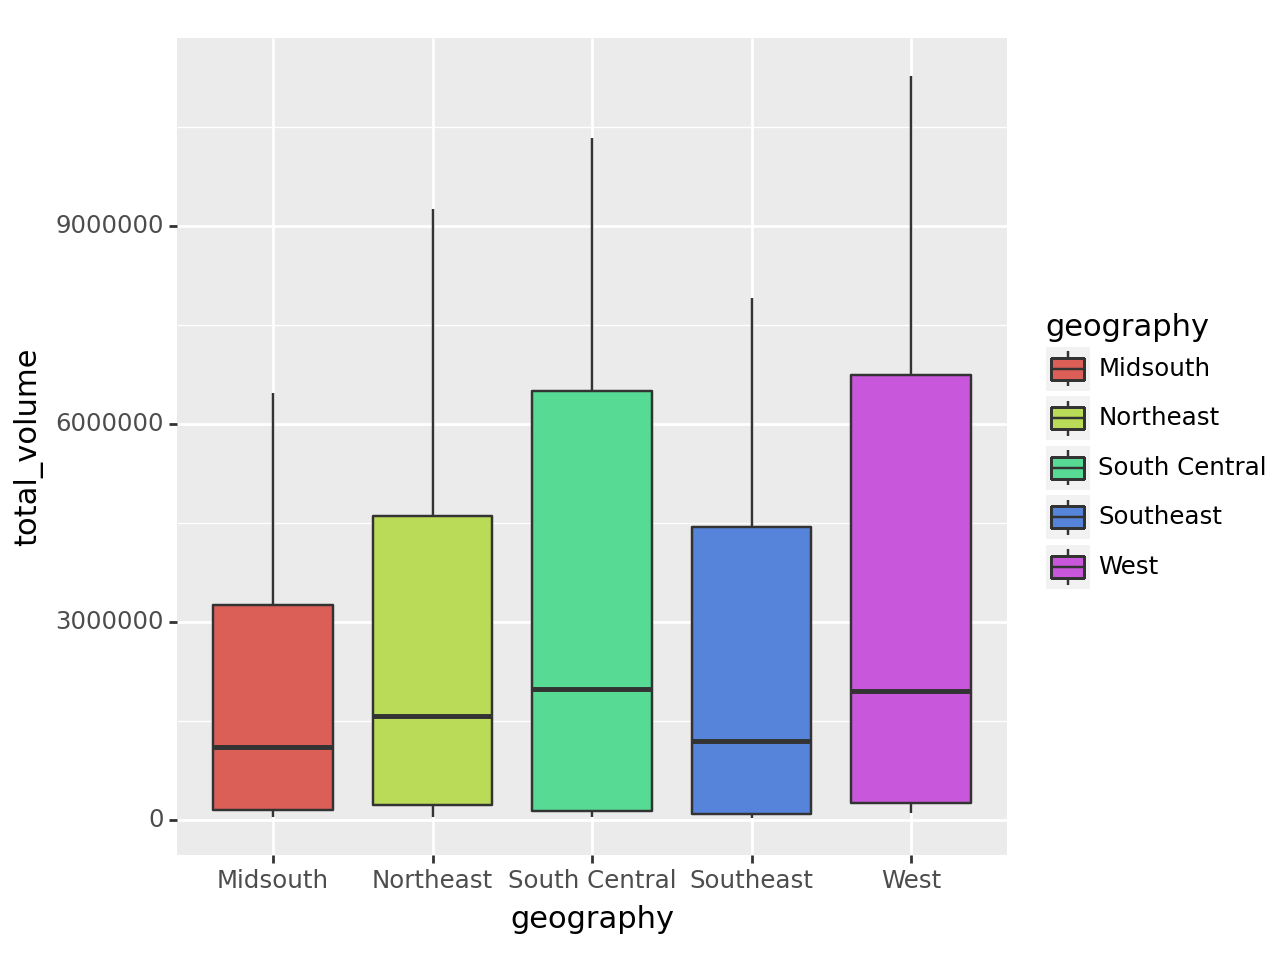

<Figure Size: (640 x 480)>

In [14]:
#plotting
from plotnine import ggplot,aes,geom_boxplot,facet_wrap,geom_bar,theme,element_text,scale_y_continuous,labs
(ggplot(av_reg, aes(x = "geography", y = "total_volume", fill = "geography"))
+ geom_boxplot()
)

In [15]:
av_reg['total_volume'].max() #just for checking

11274749.11

The following four California geographical regions are in this data set: "Los Angeles", "San Diego", "Sacramento", and "San Francisco"
# 6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [16]:
av_reg = av_cl[(av_cl['geography'] == 'Los Angeles')
              |(av_cl['geography'] == 'San Diego')
              |(av_cl['geography'] == 'Sacramento')
              |(av_cl['geography'] == 'San Francisco')]
av_reg

,date,average_price,total_volume,small/medium,large,extra_large,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33018,2020-11-29,1.43,23531.38,3303.69,2057.03,0.00,18170.66,18144.54,26.12,0.00,organic,2020,Sacramento
33019,2020-11-29,1.12,469356.72,104509.99,19988.45,7210.47,337647.81,189341.36,127701.64,20604.81,conventional,2020,San Diego
33020,2020-11-29,1.95,25799.95,894.63,838.11,0.00,24067.21,9691.46,14375.75,0.00,organic,2020,San Diego
33021,2020-11-29,1.50,644141.37,128555.43,136718.24,5597.21,373270.49,159276.65,207760.32,6233.52,conventional,2020,San Francisco


# 7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [17]:
agg_func_math = {'average_price': ['mean']} #group data by regions and types and find the average price for them
av_tmp=av_reg.groupby(['geography','type']).agg(agg_func_math).round(2).reset_index()
av_tmp.columns = ['geography', 'type', 'average_price']
av_tmp

,geography,type,average_price
0,Los Angeles,conventional,1.05
1,Los Angeles,organic,1.57
2,Sacramento,conventional,1.30
3,Sacramento,organic,1.87
4,San Diego,conventional,1.11
5,San Diego,organic,1.80
6,San Francisco,conventional,1.40
7,San Francisco,organic,2.12


In [18]:
# find the maximum difference
av_tmp['difference'] = av_tmp['average_price'].pct_change()
av_tmp[av_tmp['difference'] == av_tmp['difference'].max()]


,geography,type,average_price,difference
5,San Diego,organic,1.8,0.621622


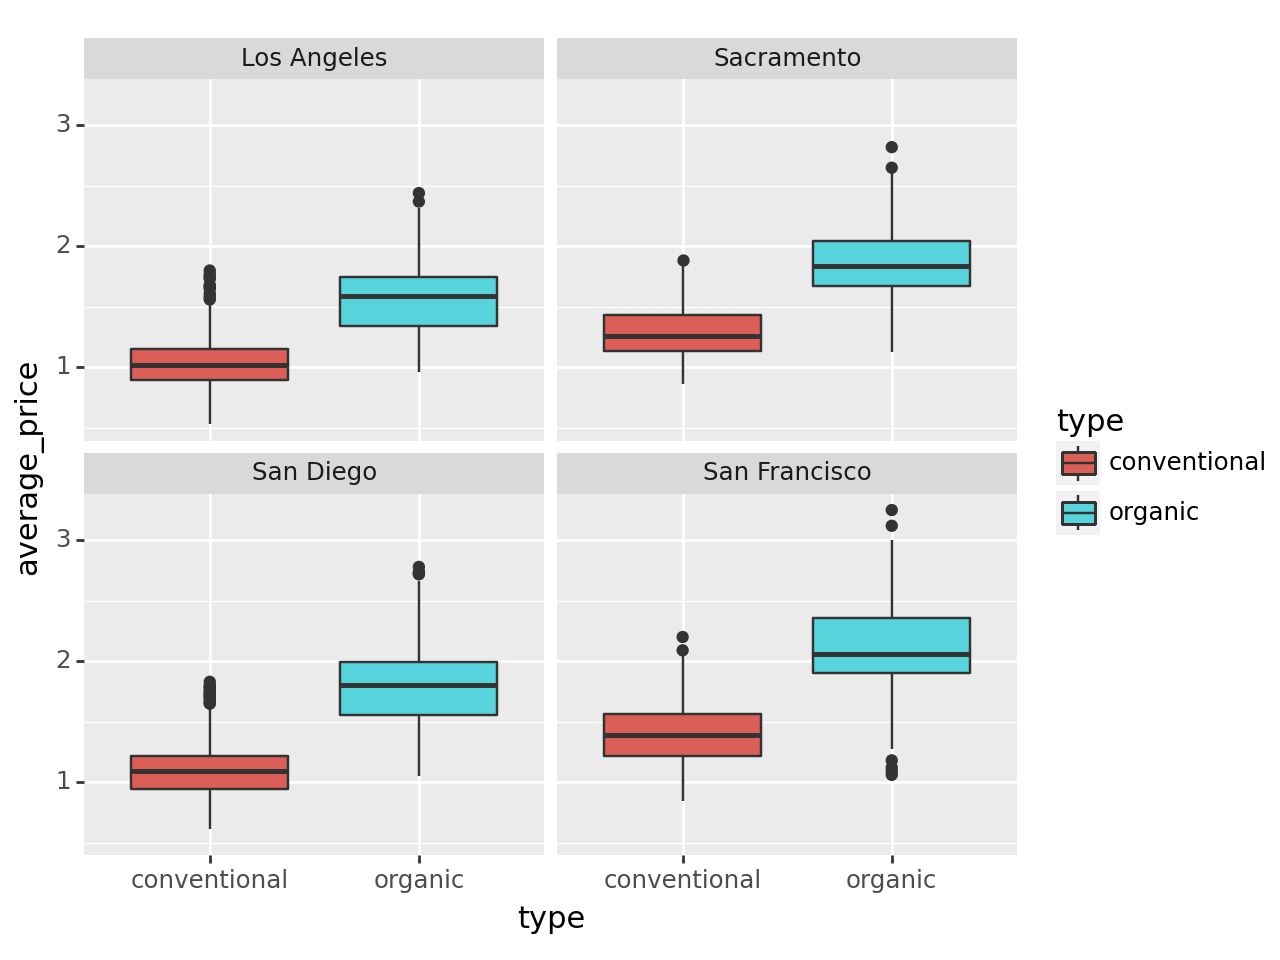

<Figure Size: (640 x 480)>

In [19]:
(ggplot(av_reg, aes(x = "type", y = "average_price", fill="type"))
+ geom_boxplot()
+ facet_wrap("geography")
)

# 8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

In [20]:
#build the new dataframe by grouping previous one by 'geography' and 'type'
agg_func_math = {'small/medium': ['sum'],'large': ['sum'],'extra_large': ['sum']}
av_tmp=av_reg.groupby(['geography','type']).agg(agg_func_math).round(2).reset_index()
av_tmp.columns = ['geography', 'type', 'small/medium','large','extra_large']
av_tmp

,geography,type,small/medium,large,extra_large
0,Los Angeles,conventional,3.589234e+08,1.358157e+08,29704534.92
1,Los Angeles,organic,4.419272e+06,6.366092e+06,1846.80
2,Sacramento,conventional,4.323263e+07,7.435955e+07,1937983.58
3,Sacramento,organic,8.595212e+05,1.310504e+06,236.44
4,San Diego,conventional,5.012059e+07,4.287247e+07,5496844.31
5,San Diego,organic,7.873589e+05,2.225778e+06,405.02
6,San Francisco,conventional,6.604697e+07,1.375095e+08,4569070.59
7,San Francisco,organic,2.540730e+06,3.473130e+06,660.76


In [21]:
#transform our data for plotting
av_tmp_1=av_tmp[['geography','type']]
av_tmp_1.insert (loc= len(av_tmp_1.columns), column='avocado_size', value='small/medium')
av_tmp_1.insert (loc= len(av_tmp_1.columns), column='quantity', value=av_tmp['small/medium'])

av_tmp_2=av_tmp[['geography','type']]
av_tmp_2.insert (loc= len(av_tmp_2.columns), column='avocado_size', value='large')
av_tmp_2.insert (loc= len(av_tmp_2.columns), column='quantity', value=av_tmp['large'])

av_tmp_3=av_tmp[['geography','type']]
av_tmp_3.insert (loc= len(av_tmp_3.columns), column='avocado_size', value='extra_large')
av_tmp_3.insert (loc= len(av_tmp_3.columns), column='quantity', value=av_tmp['extra_large'])

av_cal = pd.concat([av_tmp_1, av_tmp_2,av_tmp_3], axis=0, ignore_index=True)

print(av_cal)

        geography          type  avocado_size      quantity
0     Los Angeles  conventional  small/medium  3.589234e+08
1     Los Angeles       organic  small/medium  4.419272e+06
2      Sacramento  conventional  small/medium  4.323263e+07
3      Sacramento       organic  small/medium  8.595212e+05
4       San Diego  conventional  small/medium  5.012059e+07
5       San Diego       organic  small/medium  7.873589e+05
6   San Francisco  conventional  small/medium  6.604697e+07
7   San Francisco       organic  small/medium  2.540730e+06
8     Los Angeles  conventional         large  1.358157e+08
9     Los Angeles       organic         large  6.366092e+06
10     Sacramento  conventional         large  7.435955e+07
11     Sacramento       organic         large  1.310504e+06
12      San Diego  conventional         large  4.287247e+07
13      San Diego       organic         large  2.225778e+06
14  San Francisco  conventional         large  1.375095e+08
15  San Francisco       organic         

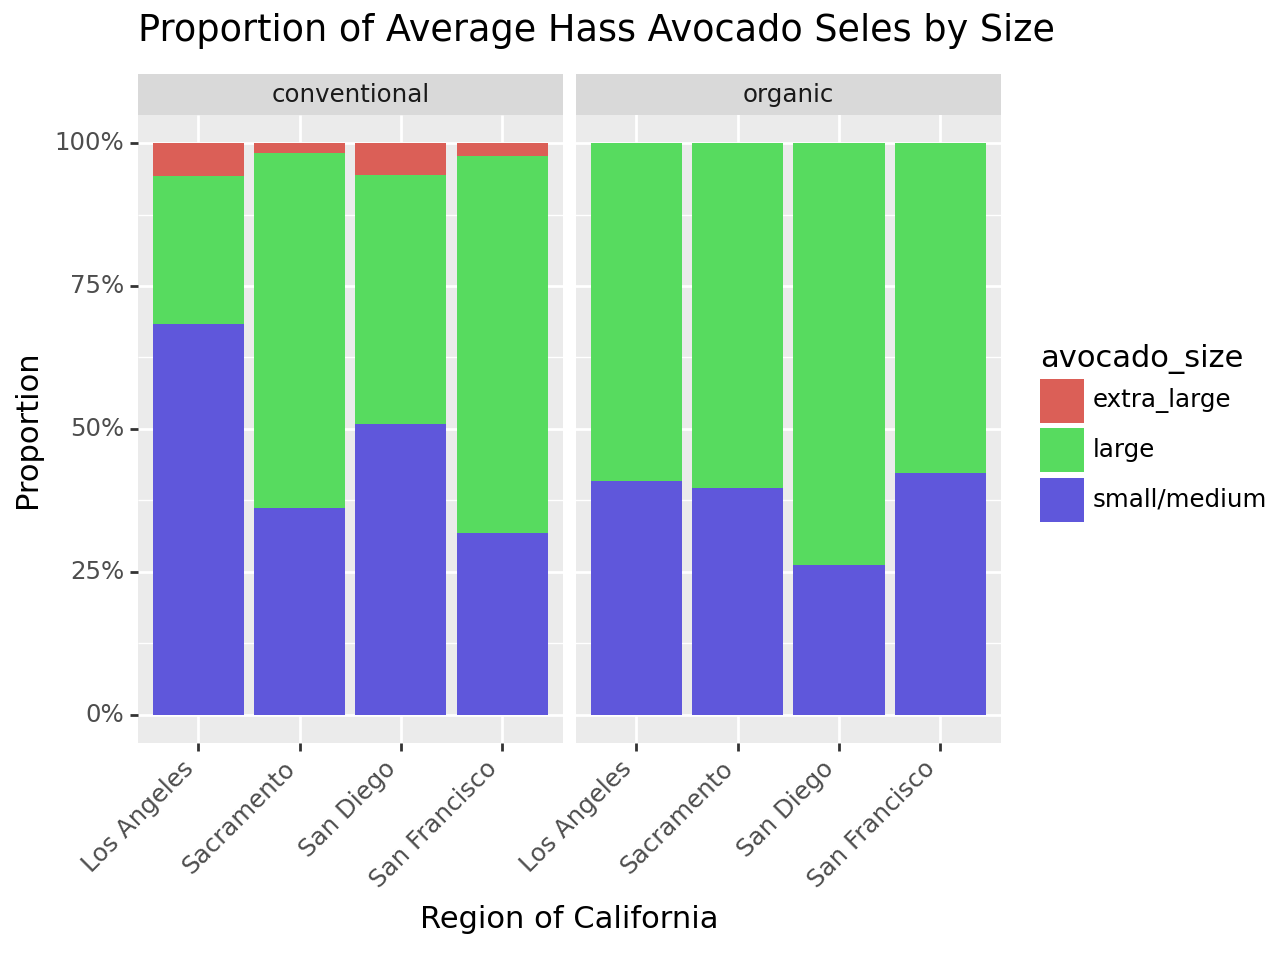

<Figure Size: (640 x 480)>

In [22]:
#plott

(ggplot(av_cal, aes(x = "geography",y="quantity", fill="avocado_size"))
+ geom_bar(position = "fill", stat = "identity")
+ facet_wrap("type")
+ labs(title = "Proportion of Average Hass Avocado Seles by Size",
             x = "Region of California",
             y = "Proportion")
+ theme(axis_text_x = element_text(angle= 45 , vjust= 1 , hjust= 1 )) 
+ scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l])
)